<a href="https://colab.research.google.com/github/VitorFRodrigues/PUCMinas_DataScience/blob/main/06-Machine_Learning/Tarefas/Clusterizacao/Exec_pratic_clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício Prático II - Clusterização**

Instituição: Pontifícia Universidade Católica de Minas Gerais

Aluno:

1. Vitor Fernando de Souza Rodrigues

Disciplina: Machine Learning

Docente: Cristiano Rodrigues de Carvalho

## OBJETIVOS
* Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.
* Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.
* Esta atividade irá precisar da base de dados: [Atividade 6 - Saude.xlsx](https://github.com/VitorFRodrigues/PUCMinas_DataScience/raw/refs/heads/main/06-Machine_Learning/Tarefas/Clusterizacao/Atividade%206%20-%20Saude.xlsx)

* A base de dados se chama **Atividade 6 - saúde.xlsx**, e possui os atributos **peso, colesterol e gênero. Peso e colesterol** são atributos numéricos. Na variável gênero, **1** corresponde ao sexo masculino e **0** ao feminino.

## EXERCÍCIO
* Utilizando a K-means, realize a clustrização com **k=2**. Tente descrever os dois grupos gerados. Utilize as informações dos clusteres para tentar diferenciar os dois grupos de risco.
* Vamos tentar encontrar **3** grupos distintos: alto risco possui colesterol e peso altos; baixo risco possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados.
* Investigue quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.

## 1. Importação de Bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## 2. Coleta de dados

In [67]:
url = 'https://github.com/VitorFRodrigues/PUCMinas_DataScience/raw/refs/heads/main/06-Machine_Learning/Tarefas/Clusterizacao/Atividade%206%20-%20Saude.xlsx'

In [68]:
dados = pd.read_excel(url)
dados = dados.drop(columns=['a', 'g', 'grupo'])
dados.head()

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1



A base de dados contém as seguintes colunas relevantes para a análise:

* Peso: O peso dos indivíduos (numérico).
* Colesterol: O nível de colesterol dos indivíduos (numérico).
* Genero: O gênero dos indivíduos, onde 1 representa masculino e 0 representa feminino.

Para realizar a clusterização usando o algoritmo K-means com
𝑘
=
2
, vamos seguir os passos:

* Pré-processamento dos dados: Remover colunas desnecessárias e lidar com valores ausentes, se necessário.
* Aplicar K-means: Agrupar os dados com base nos atributos de peso e colesterol.
* Analisar os clusters: Descrever os grupos gerados e investigar os limites para caracterizar os indivíduos como de risco.

## 3. Tratamento dos Dados

In [69]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


Todos os dados são do tipo inteiro sem valores nulos. Sendo assim, não haverá necessidade de realizar tratamento.

## 4. Análise exploratória

In [70]:
dados.describe()

,Peso,Colesterol,Genero
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


* **Gênero**: A coluna "Genero" está codificada como 0 e 1, onde 1 representa masculino e feminino representa 0. A média próxima de 0,5 indica uma distribuição equilibrada entre os gêneros no conjunto de dados.

2. **Peso**:
   - O peso médio é de aproximadamente 143,57, com um desvio padrão de 30,84, indicando uma certa variabilidade nos pesos.
   - Os valores variam de 95 a 203, com o valor do primeiro quartil em 116 e o terceiro em 171. Isso sugere que a maioria dos pesos está entre esses valores, com alguns casos extremos nos valores mais altos e mais baixos.

3. **Colesterol**:
   - A média do colesterol é de 170,43, com desvio padrão de 39,14, o que também indica variabilidade significativa.
   - O intervalo do colesterol é de 102 a 235. Valores acima de 200 podem indicar níveis altos de colesterol, o que pode ser uma preocupação em termos de saúde.
   - Os quartis mostram que 50% dos valores de colesterol estão entre 136 e 208.

Esses dados sugerem uma distribuição equilibrada entre os gêneros e indicam alguma variabilidade significativa tanto no peso quanto nos níveis de colesterol.

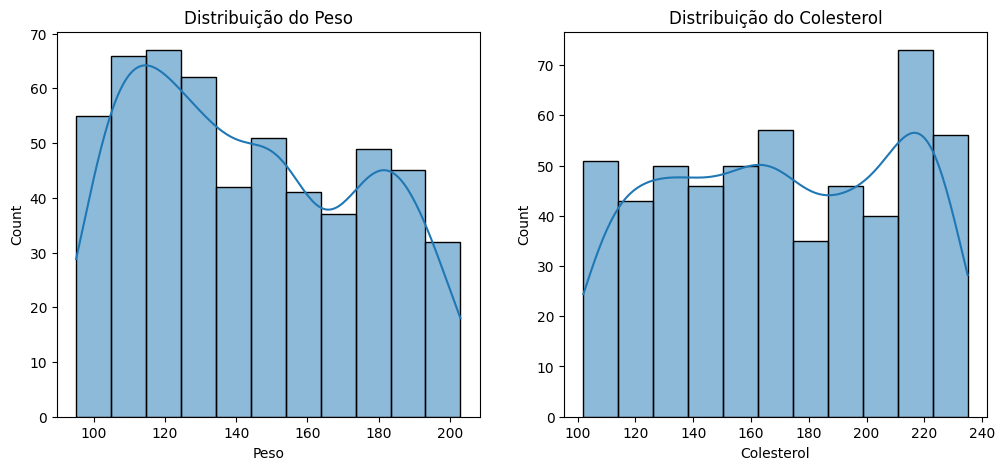

In [71]:
# Histograma para peso e colesterol
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(dados['Peso'], kde=True)
plt.title('Distribuição do Peso')

plt.subplot(1, 2, 2)
sns.histplot(dados['Colesterol'], kde=True)
plt.title('Distribuição do Colesterol')

plt.show()

Analisando os histogramas para as distribuições de peso e colesterol:

1. **Distribuição do Peso**:
   - A maioria das observações de peso está concentrada entre 100 e 130, com um pico por volta dos 120. Isso sugere que há uma maior frequência de pesos mais baixos no conjunto de dados.
   - A distribuição parece ligeiramente assimétrica à direita, indicando que existem alguns indivíduos com pesos mais altos (acima de 170) que são menos comuns.
   - O comportamento observado com um declínio gradual a partir de 120 sugere que os pesos mais altos são menos frequentes, mas ainda estão presentes em uma quantidade considerável.

2. **Distribuição do Colesterol**:
   - A distribuição do colesterol mostra alguns picos, especialmente entre os valores de 180 e 220, onde se observa uma maior concentração de indivíduos com esses níveis de colesterol.
   - Essa distribuição é menos uniforme e apresenta uma variabilidade maior, com picos e vales, indicando que os níveis de colesterol no conjunto de dados não seguem uma única tendência clara.
   - Há uma leve inclinação para a direita, com uma concentração de valores mais altos de colesterol entre 200 e 235, indicando uma possível prevalência de indivíduos com níveis de colesterol elevados.

Esses histogramas mostram que há uma dispersão considerável nas variáveis de peso e colesterol, o que pode sugerir diferentes perfis de saúde no conjunto de dados. Essas distribuições podem ser úteis para segmentação ou análise de padrões de saúde com base em peso e níveis de colesterol.

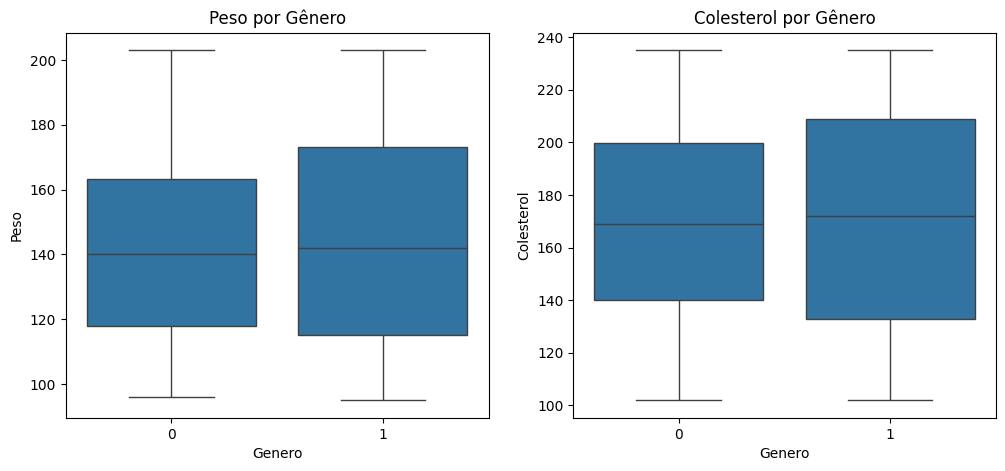

In [72]:
# Boxplot para peso e colesterol por gênero
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Genero', y='Peso', data=dados)
plt.title('Peso por Gênero')

plt.subplot(1, 2, 2)
sns.boxplot(x='Genero', y='Colesterol', data=dados)
plt.title('Colesterol por Gênero')

plt.show()

Esses boxplots indicam que tanto o peso quanto o colesterol possuem distribuições similares entre os gêneros, sugerindo que o gênero pode não ter uma influência significativa nessas variáveis no conjunto de dados analisado. Essa similaridade pode indicar que outros fatores, como idade, dieta, ou estilo de vida, poderiam ser mais relevantes para diferenciar os níveis de peso e colesterol.

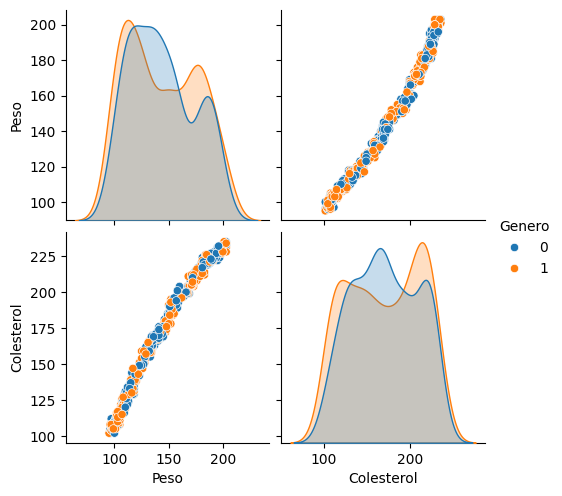

In [73]:
# Pairplot para visualizar a relação entre todas as variáveis
sns.pairplot(dados, hue='Genero')
plt.show()

Analisando o pairplot que mostra a relação entre Peso e Colesterol com a distinção de Gênero:

1. **Distribuição Univariada (Peso e Colesterol)**:
   - Os gráficos de densidade para Peso e Colesterol indicam que a distribuição é ligeiramente diferente entre os gêneros (0 e 1).
   - No gráfico de Peso, o gênero feminino (0) apresenta uma distribuição mais concentrada à esquerda (em valores menores), enquanto o gênero masculino apresenta um leve deslocamento para valores mais altos. No entanto, a diferença não é muito acentuada.
   - Para Colesterol, as distribuições de ambos os gêneros são quase sobrepostas, mas com uma leve concentração de valores mais baixos para o gênero feminino.

2. **Relação entre Peso e Colesterol**:
   - A relação entre Peso e Colesterol parece ser quase linear, indicando que à medida que o peso aumenta, o colesterol também tende a aumentar. Esse comportamento é consistente para ambos os gêneros, sem diferenças notáveis na inclinação ou dispersão dos dados.
   - A alta correlação visual entre Peso e Colesterol pode sugerir uma dependência entre essas duas variáveis, possivelmente indicando que o aumento de peso está associado a níveis mais altos de colesterol.

3. **Diferenças entre Gêneros**:
   - Embora haja algumas pequenas diferenças nas distribuições de Peso e Colesterol entre os gêneros, elas não são muito significativas. Ambos os gêneros apresentam uma relação semelhante entre Peso e Colesterol, com as distribuições apresentando um leve deslocamento em algumas áreas, mas mantendo um padrão similar.

Em resumo, o pairplot confirma a alta correlação entre Peso e Colesterol, além de indicar que as diferenças de distribuição entre os gêneros são mínimas. Esse tipo de gráfico sugere que, nesse conjunto de dados, o gênero pode não ser uma variável muito relevante para distinguir os valores de Peso e Colesterol.

## 5. Aplicação de metodo Elbow para escolha de número de clusters

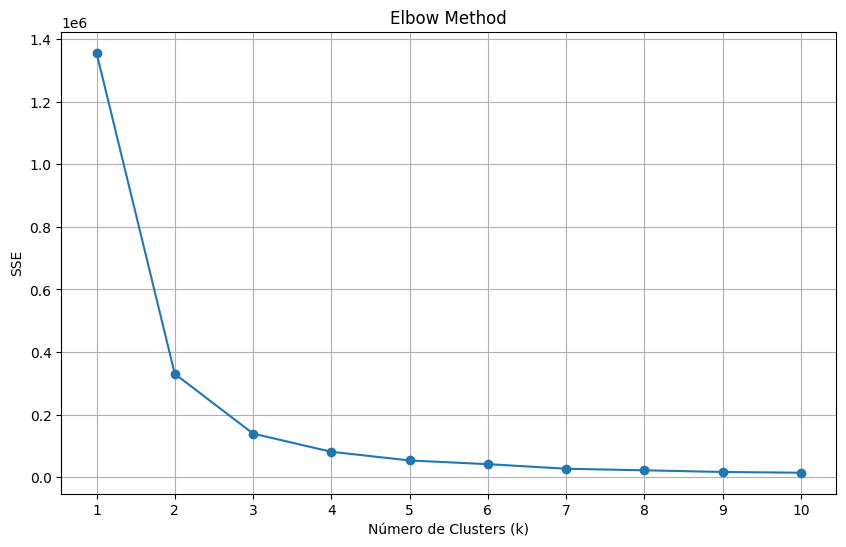

In [74]:
# Elbow Method
sse = []
k_values = range(1, 11)  # Testando de 1 a 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados[['Peso', 'Colesterol']])
    sse.append(kmeans.inertia_)  # Soma dos erros quadráticos

# Plotando o Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Analisando o gráfico do método Elbow para o K-Means, podemos observar o seguinte:

1. **Ponto de Cotovelo**:
   - O gráfico mostra uma queda acentuada no valor de **SSE (Soma dos Erros ao Quadrado)** conforme o número de clusters aumenta de 1 para 3.
   - Após o ponto em k = 3, a diminuição no SSE é bem menos acentuada, indicando que o ganho de adicionar mais clusters é relativamente pequeno em relação à redução de SSE.

2. **Escolha do Número Ideal de Clusters**:
   - O "cotovelo" no gráfico está aproximadamente em **k = 3**, onde há uma mudança significativa na inclinação da curva. Esse ponto sugere que 3 clusters podem ser uma escolha apropriada para este conjunto de dados, já que a partir desse ponto, o aumento no número de clusters não resulta em uma redução expressiva no erro.

3. **Justificativa para Escolher k = 3**:
   - Utilizar k = 3 como o número de clusters é uma escolha balanceada entre a simplicidade do modelo e a capacidade de representar a estrutura dos dados. Esse valor mantém a segmentação eficiente sem introduzir clusters adicionais que pouco contribuem para a diminuição do erro total.

## 6. **K-MEANS: Aplicando Modelo**

### 6.1. **K=2**

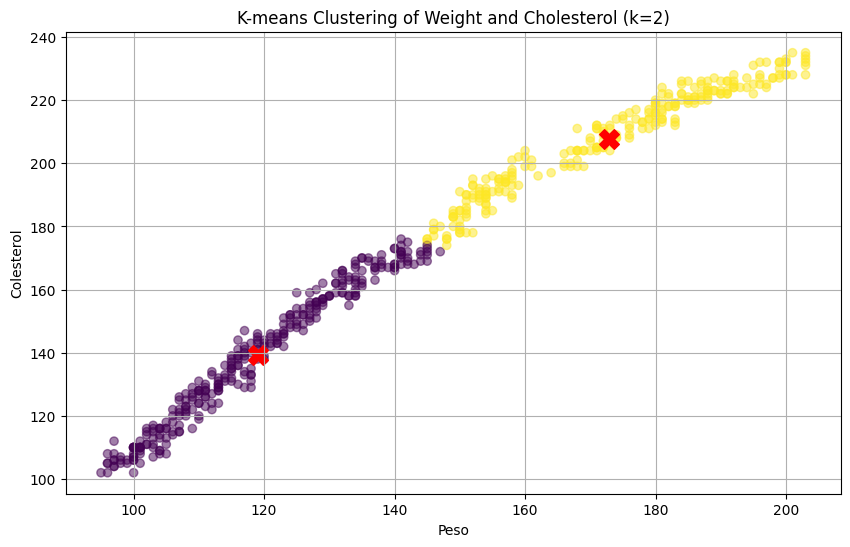

In [75]:
# K-means clustering com k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
dados['Cluster_2'] = kmeans_2.fit_predict(dados[['Peso', 'Colesterol']])

# Visualizando o clusters para k=2
plt.figure(figsize=(10, 6))
plt.scatter(dados['Peso'], dados['Colesterol'], c=dados['Cluster_2'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c='red', s=200, marker='X')  # centro cluster
plt.title('K-means Clustering of Weight and Cholesterol (k=2)')
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.grid(True)
plt.show()

In [80]:
# Encontrar os limites de Peso e colesterol que separa os dois grupos

# Centroides dos clusters
centroides = kmeans_2.cluster_centers_

# Encontrando os limites baseado no cluster de alto risco
peso_limite = (centroides[0][0]+centroides[1][0])/2
colesterol_limite = (centroides[0][1]+centroides[1][1])/2

print(f"Limite de peso para pacientes de alto risco: {peso_limite:.2f}")
print(f"Limite de colesterol para pacientes de alto risco: {colesterol_limite:.2f}")

Limite de peso para pacientes de alto risco: 145.98
Limite de colesterol para pacientes de alto risco: 173.49


Com base nos resultados do K-means clustering com \( k=2 \) e nos limites identificados para o peso (145.98) e colesterol (173.49), podemos descrever os dois grupos gerados como dois perfis de risco distintos:

1. Grupo de Baixo Risco
- **Peso**: A maioria dos indivíduos desse grupo possui peso **abaixo de 145.98**.
- **Colesterol**: Os níveis de colesterol para esses indivíduos estão **abaixo de 173.49**.
- **Descrição**: Esse grupo representa indivíduos que estão mais leves e possuem níveis de colesterol mais baixos. Estes valores são indicadores de um perfil de menor risco para condições associadas ao colesterol elevado e, potencialmente, doenças cardiovasculares.
  
2. Grupo de Alto Risco
- **Peso**: Os indivíduos desse grupo possuem peso **acima de 145.98**.
- **Colesterol**: Os níveis de colesterol para esses indivíduos estão **acima de 173.49**.
- **Descrição**: Esse grupo representa indivíduos com um perfil de maior risco, caracterizado por um peso mais alto e níveis elevados de colesterol. Ambos os fatores são conhecidos por estarem associados a um risco aumentado de problemas de saúde, especialmente doenças cardíacas e metabólicas.

Essa análise sugere que o peso e o colesterol são fatores importantes para segmentar os indivíduos em termos de risco à saúde, e os valores médios entre os centros dos clusters servem como limites para essa classificação. Este tipo de análise pode ser útil em contextos de saúde preventiva, onde é necessário identificar e monitorar indivíduos com perfis de alto risco.

### 6.2. **K=3**

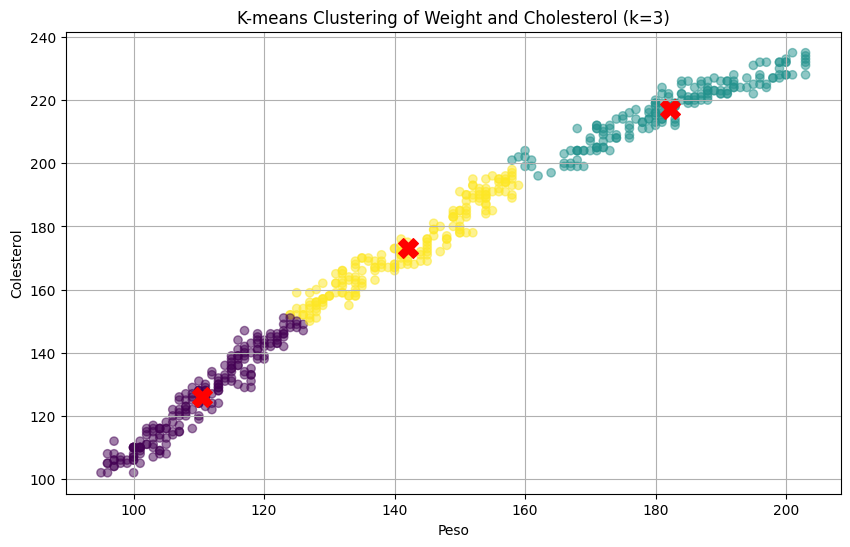

In [77]:
# K-means clustering com k=3 - fit predict
kmeans_3 = KMeans(n_clusters=3, random_state=42)
dados['Cluster_3'] = kmeans_3.fit_predict(dados[['Peso', 'Colesterol']])

# Descrevendo o clusters para  k=3
plt.figure(figsize=(10, 6))
plt.scatter(dados['Peso'], dados['Colesterol'], c=dados['Cluster_3'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], c='red', s=200, marker='X')  # cluster centers
plt.title('K-means Clustering of Weight and Cholesterol (k=3)')
plt.xlabel('Peso')
plt.ylabel('Colesterol')
plt.grid(True)
plt.show()

In [82]:
# Encontrar os limites de Peso e colesterol que separa os três grupos

# Centroides dos clusters
centroides = sorted(kmeans_3.cluster_centers_, key=lambda x: x[0])
centroides_sorted = []
for centroid in centroides:
    centroides_sorted.append(centroid.tolist())
centroides_sorted = np.array(centroides_sorted)

# Encontrando os limites
peso_limite_alto =        abs((centroides[2][0]+centroides[1][0])/2)
colesterol_limite_alto =  abs((centroides[2][1]+centroides[1][1])/2)
peso_limite_baixo =       abs((centroides[1][0]+centroides[0][0])/2)
colesterol_limite_baixo = abs((centroides[1][1]+centroides[0][1])/2)

print(f"Limite de peso para pacientes de alto risco: {peso_limite_alto:.2f}")
print(f"Limite de colesterol para pacientes de alto risco: {colesterol_limite_alto:.2f}")
print(f"Limite de peso para pacientes de baixo risco: {peso_limite_baixo:.2f}")
print(f"Limite de colesterol para pacientes de baixo risco: {colesterol_limite_baixo:.2f}")

Limite de peso para pacientes de alto risco: 162.13
Limite de colesterol para pacientes de alto risco: 195.14
Limite de peso para pacientes de baixo risco: 126.23
Limite de colesterol para pacientes de baixo risco: 149.61


Com \( k=3 \), a clusterização gerou três grupos distintos baseados em peso e colesterol. Esses clusters podem ser interpretados da seguinte forma:

1. Grupo de Baixo Risco
- **Peso Limite**: Abaixo de 126.23
- **Colesterol Limite**: Abaixo de 149.61
- **Descrição**: Este grupo é composto por indivíduos com pesos e níveis de colesterol relativamente mais baixos. Esses valores sugerem um perfil de baixo risco para problemas de saúde relacionados a colesterol elevado e obesidade, potencialmente indicando indivíduos que possuem um estilo de vida mais saudável ou uma predisposição metabólica favorável.

2. Grupo de Médio Risco
- **Peso Limite**: Entre 126.23 e 162.13
- **Colesterol Limite**: Entre 149.61 e 195.14
- **Descrição**: O grupo de médio risco abrange indivíduos com pesos e níveis de colesterol moderados. Esses valores são intermediários e podem representar uma população com um risco moderado de problemas de saúde, possivelmente necessitando de atenção para manter ou melhorar os indicadores de saúde e evitar que esses valores aumentem.

3. Grupo de Alto Risco
- **Peso Limite**: Acima de 162.13
- **Colesterol Limite**: Acima de 195.14
- **Descrição**: Este grupo representa indivíduos com pesos e níveis de colesterol mais elevados. Esses valores estão associados a um maior risco para condições relacionadas à saúde, como doenças cardiovasculares e metabólicas. Este grupo de alto risco pode beneficiar-se de monitoramento mais próximo e intervenções para reduzir o risco de complicações.

Comparação e Interpretação dos Grupos

A separação em três grupos fornece uma segmentação mais detalhada dos perfis de risco:

- **Grupo de Baixo Risco**: Baixos níveis de peso e colesterol, representando indivíduos com menor risco.
- **Grupo de Médio Risco**: Indivíduos com valores moderados, sugerindo um risco médio de complicações.
- **Grupo de Alto Risco**: Indivíduos com os valores mais altos de peso e colesterol, indicando maior necessidade de acompanhamento.

Esse modelo com \( k=3 \) permite uma classificação mais refinada e pode ser útil para definir diferentes níveis de intervenção para cada grupo. A segmentação facilita a priorização de intervenções de saúde de acordo com o perfil de risco.